In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import all data files.
aisles = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
order_product_prior = pd.read_csv('order_products__prior.csv')
order_product_train = pd.read_csv('order_products__train.csv')

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [9]:
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [10]:
order_products = order_product_prior.append(order_product_train)
order_products.head()

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_4876\2678278029.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_products = order_product_prior.append(order_product_train)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [11]:
#merge all the data files to a single dataframe to find the buying patterns.
all_files=pd.merge(orders, order_products, on='order_id', how='left')
all_files = all_files.merge(products, on= 'product_id', how='left')
all_files = all_files.merge(aisles, on='aisle_id', how='left')
all_files = all_files.merge(departments, on='department_id', how='left')
all_files.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


In [11]:
all_files.tail()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
33894101,272231,206209,train,14,6,14,30.0,40603.0,4.0,0.0,Fabric Softener Sheets,75.0,17.0,laundry,household
33894102,272231,206209,train,14,6,14,30.0,15655.0,5.0,0.0,Dark Chocolate Mint Snacking Chocolate,45.0,19.0,candy chocolate,snacks
33894103,272231,206209,train,14,6,14,30.0,42606.0,6.0,0.0,Phish Food Frozen Yogurt,37.0,1.0,ice cream ice,frozen
33894104,272231,206209,train,14,6,14,30.0,37966.0,7.0,0.0,French Baguette Bread,112.0,3.0,bread,bakery
33894105,272231,206209,train,14,6,14,30.0,39216.0,8.0,1.0,Original Multigrain Spoonfuls Cereal,121.0,14.0,cereal,breakfast


In [12]:
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [13]:
order_products = order_products.merge(products, on='product_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products = order_products.merge(aisles, on='aisle_id', how='left')
order_products = order_products.merge(departments, on='department_id', how='left')

In [14]:
order_products.isnull()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33819101,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33819102,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33819103,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
33819104,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients,pantry


In [16]:
order_products.shape

(33819106, 15)

In [17]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set',
       'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'aisle', 'department'],
      dtype='object')

In [18]:
order_products.info

<bound method DataFrame.info of           order_id  product_id  add_to_cart_order  reordered  \
0                2       33120                  1          1   
1                2       28985                  2          1   
2                2        9327                  3          0   
3                2       45918                  4          1   
4                2       30035                  5          0   
...            ...         ...                ...        ...   
33819101   3421063       14233                  3          1   
33819102   3421063       35548                  4          1   
33819103   3421070       35951                  1          1   
33819104   3421070       16953                  2          1   
33819105   3421070        4724                  3          1   

                             product_name  aisle_id  department_id  user_id  \
0                      Organic Egg Whites        86             16   202279   
1                   Michigan Organic Kale

In [19]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,7.121799e+01,9.918544e+00,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,3.819898e+01,6.281655e+00,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


# Memory Reducing code

In [20]:
def reduce_memory(df):
    
    """
    This function reduce the dataframe memory usage by converting it's type for easier handling.
    
    Parameters: Dataframe
    Return: Dataframe
    """
    
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    
    for col in df.columns:
        if df[col].dtypes in ["int64", "int32", "int16"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.iinfo(np.int8).min and cmax < np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            
            elif cmin > np.iinfo(np.int16).min and cmax < np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            
            elif cmin > np.iinfo(np.int32).min and cmax < np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
        
        if df[col].dtypes in ["float64", "float32"]:
            
            cmin = df[col].min()
            cmax = df[col].max()
            
            if cmin > np.finfo(np.float16).min and cmax < np.finfo(np.float16).max:
                df[col] = df[col].astype(np.float16)
            
            elif cmin > np.finfo(np.float32).min and cmax < np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
    
    print("")
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    
    return df

In [21]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients,pantry


In [22]:
temp_df = order_products.groupby('aisle')['reordered'].agg(['count','sum'])
temp_df = temp_df.sort_values(by='sum',ascending=False)
temp_df = temp_df.rename(columns={'count':'Total Orders', 'sum':'Reorders', 'aisle':'Aisle'}).reset_index()
temp_df = temp_df.rename(columns={'aisle':'Aisles'})
temp_df.head(25)

,Aisles,Total Orders,Reorders
0,fresh fruits,3792661,2726251
1,fresh vegetables,3568630,2123540
2,packaged vegetables fruits,1843806,1178700
3,yogurt,1507583,1034957
4,milk,923659,722128
5,water seltzer sparkling water,878150,640988
6,packaged cheese,1021462,598280
7,soy lactosefree,664493,460069
8,chips pretzels,753739,444036
9,bread,608469,408010


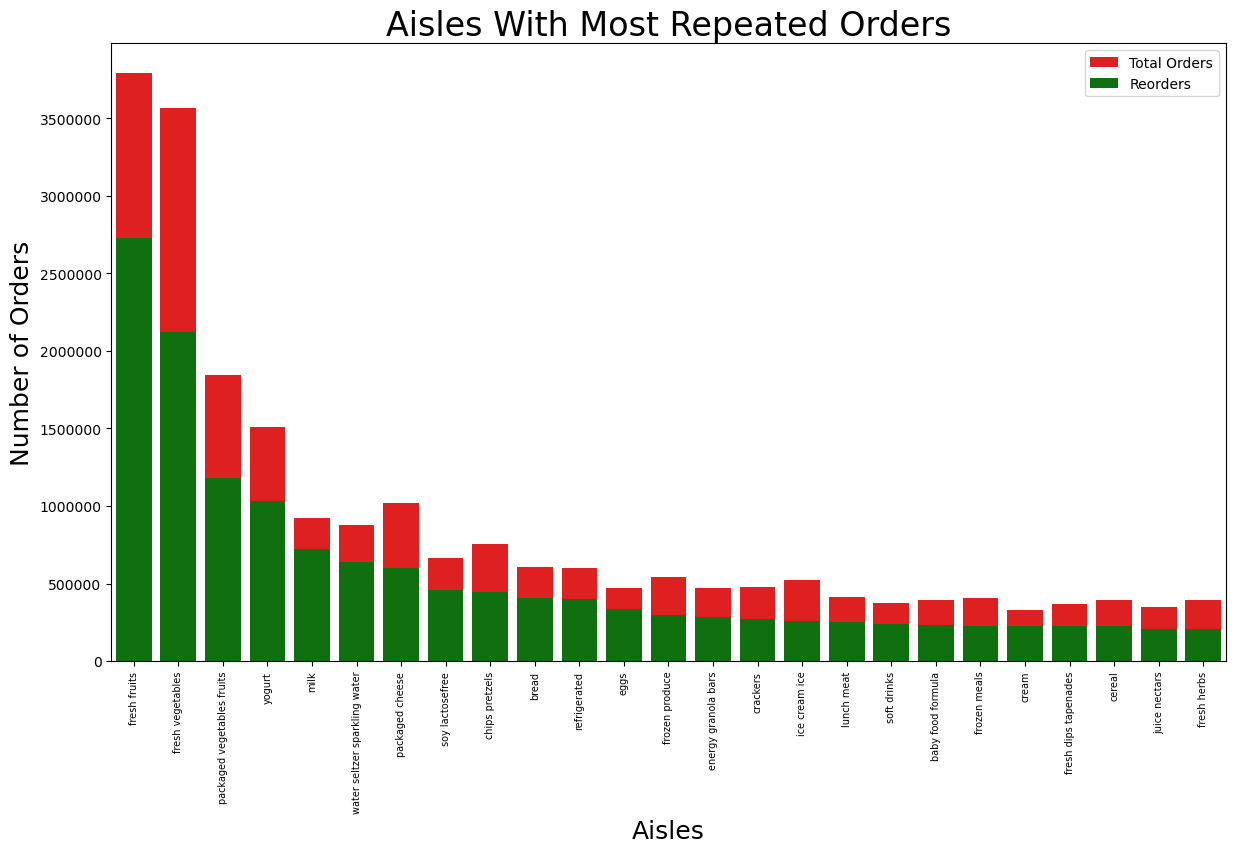

In [23]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=temp_df['Aisles'][0:25],y=temp_df['Total Orders'],color='Red', label = 'Total Orders')
ax = sns.barplot(x=temp_df['Aisles'][0:25],y=temp_df['Reorders'],color='green', label = 'Reorders')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7, rotation=45)
plt.tight_layout()
ax.set_xlabel('Aisles',size=18)
ax.set_ylabel('Number of Orders', size=18)
ax.set_title('Aisles With Most Repeated Orders', size=24)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.xticks(rotation='vertical')
plt.savefig("Aisles With Most Repeated Orders")
ax.legend()
plt.show()

In [24]:
temp_df['Reordered Ratio'] = (temp_df['Reorders']/temp_df['Total Orders'])*100
temp_df = temp_df.sort_values('Reordered Ratio',ascending=False)
temp_df['Reordered Ratio'] = temp_df['Reordered Ratio'].astype(float).round(2)
temp_df.head(20)

,Aisles,Total Orders,Reorders,Reordered Ratio
4,milk,923659,722128,78.18
5,water seltzer sparkling water,878150,640988,72.99
0,fresh fruits,3792661,2726251,71.88
11,eggs,472009,333408,70.64
7,soy lactosefree,664493,460069,69.24
25,packaged produce,289488,200319,69.20
3,yogurt,1507583,1034957,68.65
20,cream,330358,226356,68.52
9,bread,608469,408010,67.06
10,refrigerated,599109,397213,66.30


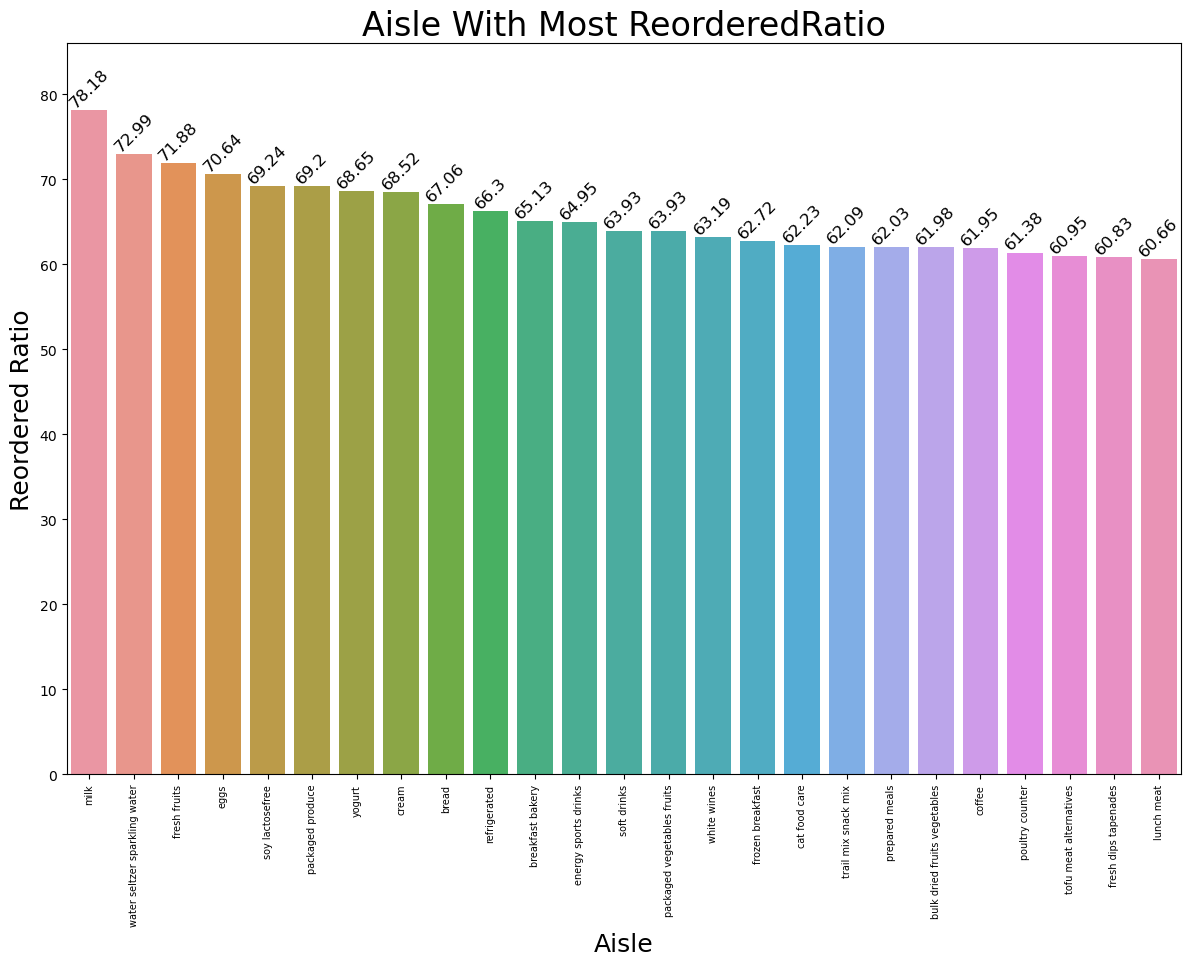

In [25]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=temp_df['Aisles'][0:25],y=temp_df['Reordered Ratio'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.bar_label(ax.containers[-1], rotation=45, size=12)
ax.margins(y=0.1)
plt.tight_layout()
ax.set_xlabel('Aisle',size=18)
ax.set_ylabel('Reordered Ratio', size=18)
ax.set_title('Aisle With Most Reordered Ratio', size=24)
plt.xticks(rotation='vertical')
plt.savefig("Aisles With Most Repeated Ratio")
plt.show()

In [26]:
temp_df = order_products.groupby('department')['reordered'].agg(['count','sum'])
temp_df = temp_df.sort_values(by='sum',ascending=False)
temp_df = temp_df.rename(columns={'count':'Total Orders', 'sum':'Reorders'}).reset_index()
temp_df.head(25)

,department,Total Orders,Reorders
0,produce,9888378,6432596
1,dairy eggs,5631067,3773723
2,beverages,2804175,1832952
3,snacks,3006412,1727075
4,frozen,2336858,1268058
5,bakery,1225181,769880
6,pantry,1956819,679799
7,deli,1095540,666231
8,canned goods,1114857,511317
9,meat seafood,739238,420349


In [27]:
temp_df['Total Orders'].sum()

33819106

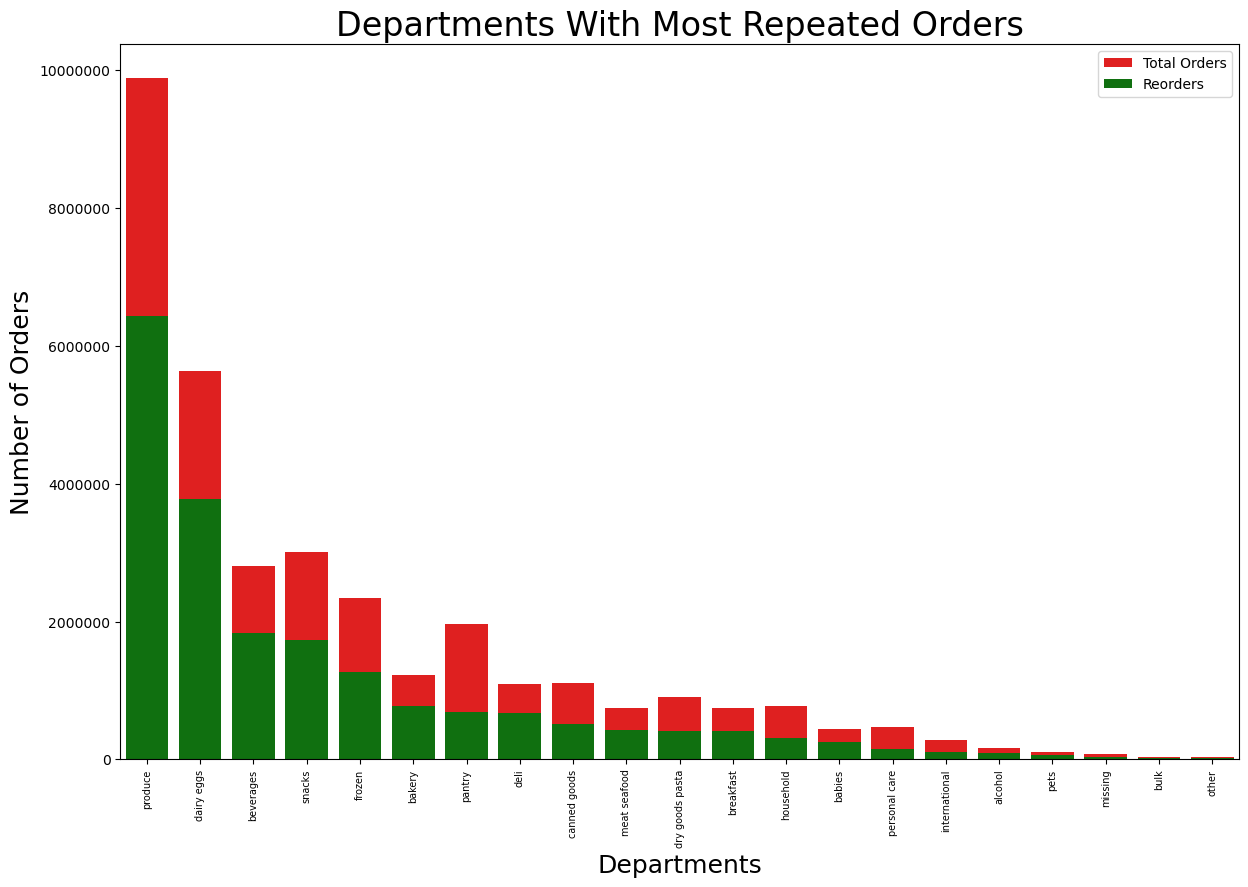

In [28]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=temp_df['department'][0:25],y=temp_df['Total Orders'],color='Red', label = 'Total Orders')
ax = sns.barplot(x=temp_df['department'][0:24],y=temp_df['Reorders'],color='Green', label = 'Reorders')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Departments',size=18)
ax.set_ylabel('Number of Orders', size=18)
ax.set_title('Departments With Most Repeated Orders', size=24)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='vertical')
ax.legend()
plt.savefig("Departments With Most Repeated Orders")
plt.show()

In [29]:
temp_df['Reordered Ratio'] = (temp_df['Reorders']/temp_df['Total Orders'])*100
temp_df = temp_df.sort_values('Reordered Ratio',ascending=False)
temp_df['Reordered Ratio'] = temp_df['Reordered Ratio'].astype(float).round(2)
temp_df.head(10)

,department,Total Orders,Reorders,Reordered Ratio
1,dairy eggs,5631067,3773723,67.02
2,beverages,2804175,1832952,65.37
0,produce,9888378,6432596,65.05
5,bakery,1225181,769880,62.84
7,deli,1095540,666231,60.81
17,pets,102221,61594,60.26
13,babies,438743,253453,57.77
19,bulk,35932,20736,57.71
3,snacks,3006412,1727075,57.45
16,alcohol,159294,90992,57.12


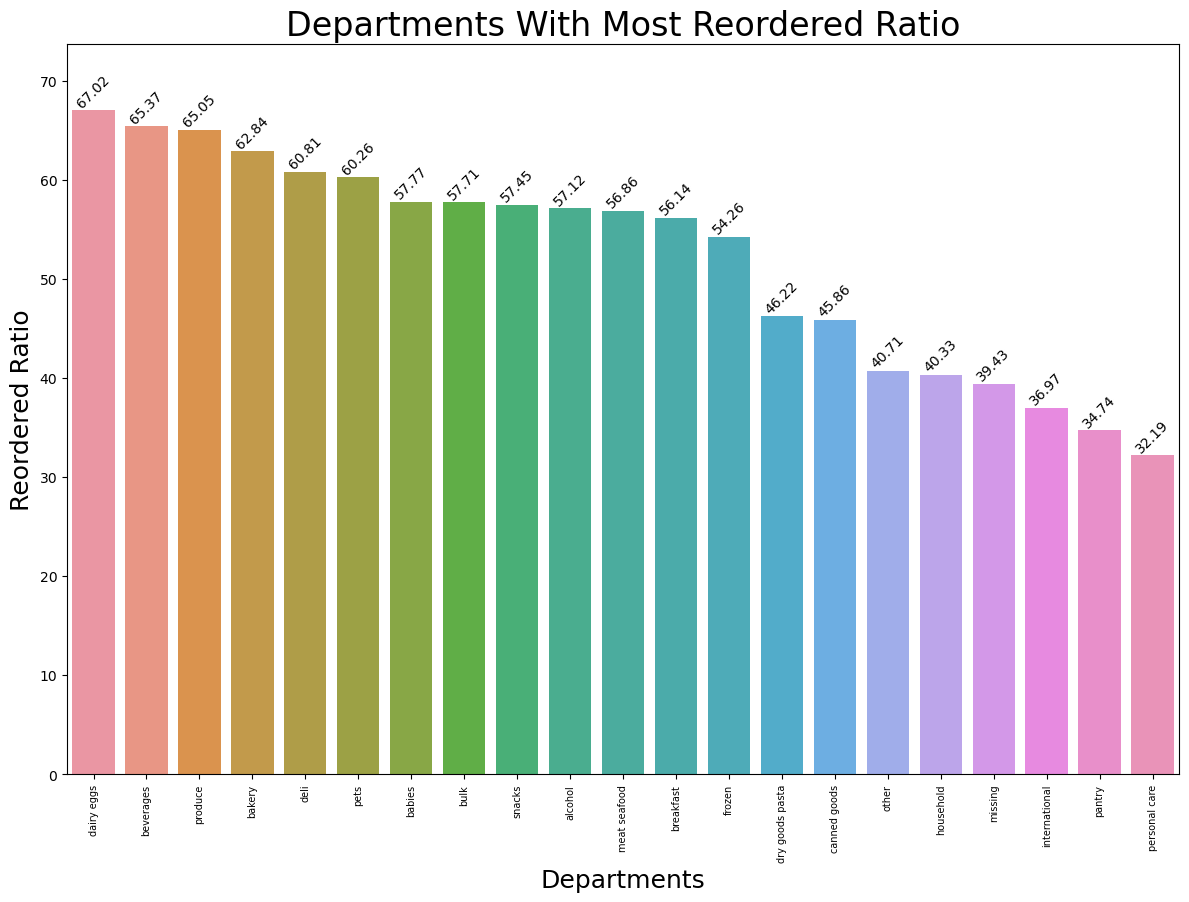

In [30]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=temp_df['department'][0:25],y=temp_df['Reordered Ratio'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.bar_label(ax.containers[-1], rotation=45)
ax.margins(y=0.1)
plt.tight_layout()
ax.set_xlabel('Departments',size=18)
ax.set_ylabel('Reordered Ratio', size=18)
ax.set_title('Departments With Most Reordered Ratio', size=24)
plt.xticks(rotation='vertical')
plt.savefig("Departments With Most Repeated ratio")
plt.show()

In [31]:
temp_df = order_products.groupby('product_name')['reordered'].agg(['count','sum'])
temp_df = temp_df.sort_values(by='sum',ascending=False)
temp_df = temp_df.rename(columns={'count':'Total Orders', 'sum':'Reorders'}).reset_index()
temp_df.head(10)

,product_name,Total Orders,Reorders
0,Banana,491291,415166
1,Bag of Organic Bananas,394930,329275
2,Organic Strawberries,275577,214448
3,Organic Baby Spinach,251705,194939
4,Organic Hass Avocado,220877,176173
5,Organic Avocado,184224,140270
6,Organic Whole Milk,142813,118684
7,Large Lemon,160792,112178
8,Organic Raspberries,142603,109688
9,Strawberries,149445,104588


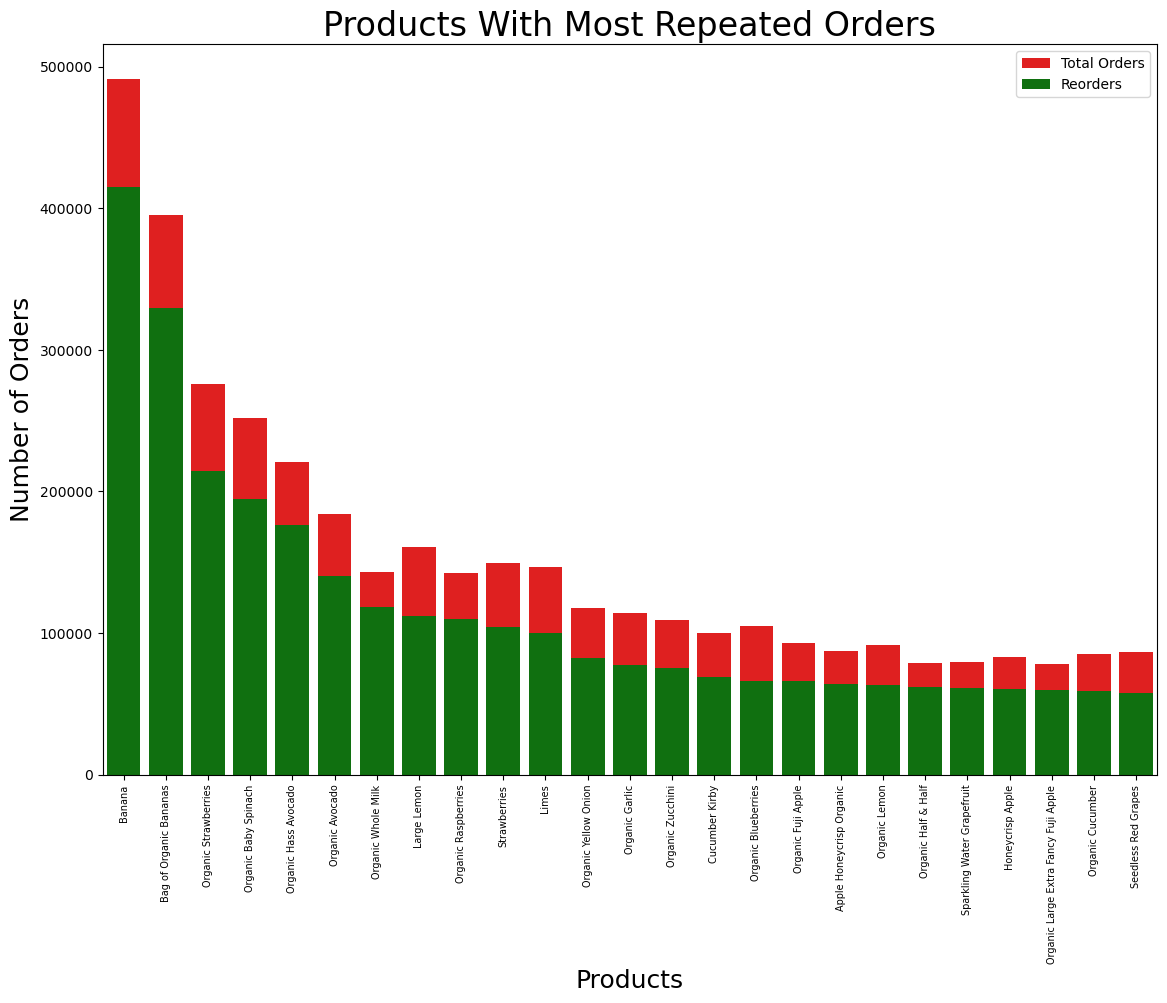

In [32]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=temp_df['product_name'][0:25],y=temp_df['Total Orders'],color='Red', label = 'Total Orders')
ax = sns.barplot(x=temp_df['product_name'][0:25],y=temp_df['Reorders'],color='Green', label = 'Reorders')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
ax.set_xlabel('Products',size=18)
ax.set_ylabel('Number of Orders', size=18)
ax.set_title('Products With Most Repeated Orders', size=24)
plt.xticks(rotation='vertical')
ax.legend()
plt.savefig("Products With Most Repeated Orders")
plt.show()

In [33]:
temp_df['Reordered Ratio'] = (temp_df['Reorders']/temp_df['Total Orders'])*100
temp_df = temp_df.sort_values('Reordered Ratio',ascending=False)
temp_df['Reordered Ratio'] = temp_df['Reordered Ratio'].astype(float).round(2)
temp_df.head(20)

,product_name,Total Orders,Reorders,Reordered Ratio
16560,Raw Veggie Wrappers,69,65,94.20
14774,Serenity Ultimate Extrema Overnight Pads,90,84,93.33
30084,Orange Energy Shots,13,12,92.31
14061,Chocolate Love Bar,102,94,92.16
22182,Soy Powder Infant Formula,35,32,91.43
20189,Simply Sleep Nighttime Sleep Aid,45,41,91.11
25874,"Energy Shot, Grape Flavor",22,20,90.91
23608,Russian River Valley Reserve Pinot Noir,30,27,90.00
16991,Bars Peanut Butter,69,62,89.86
17205,Soy Crisps Lightly Salted,67,60,89.55


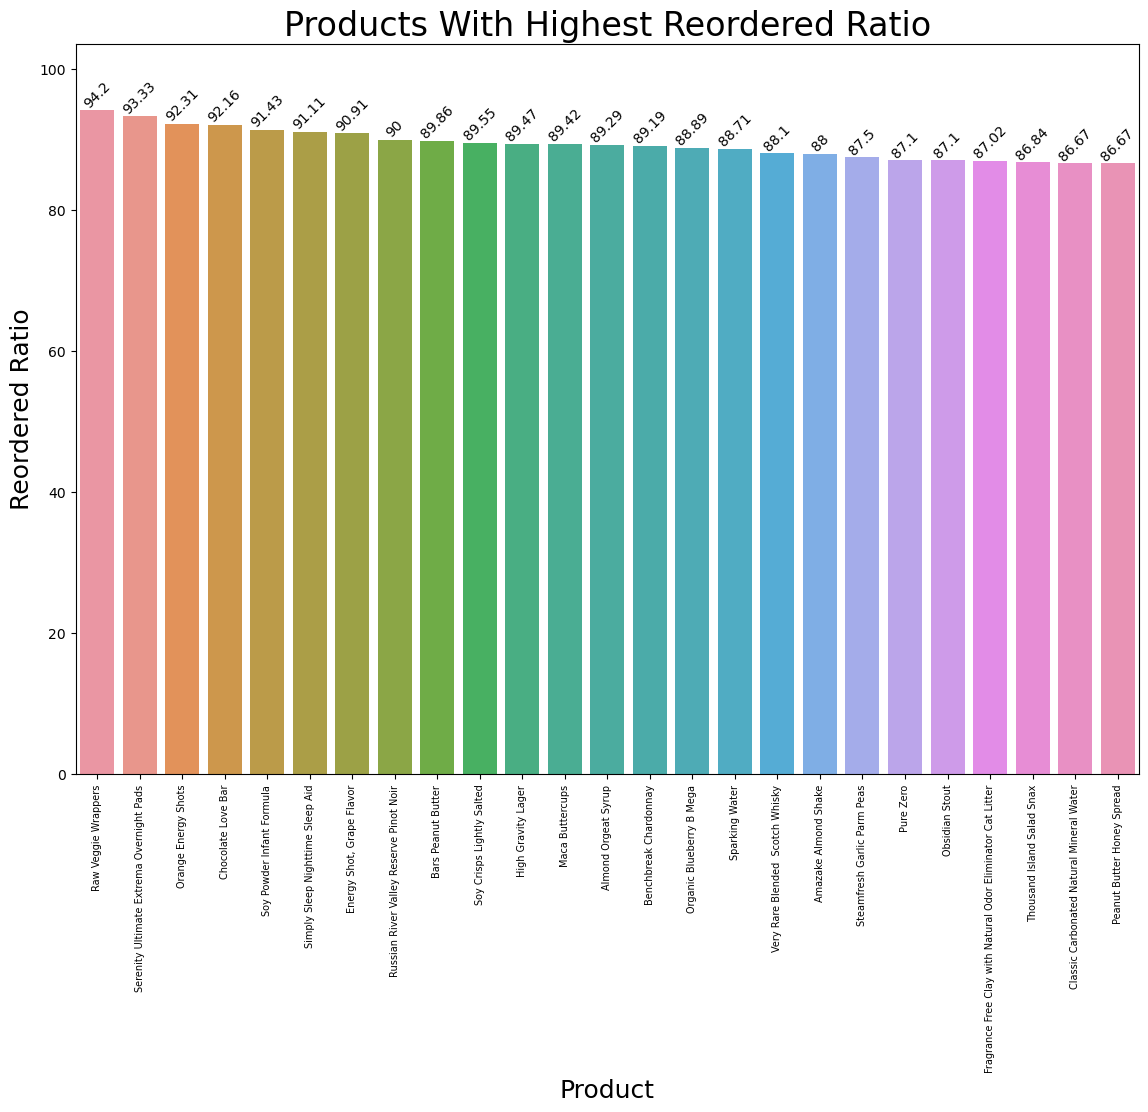

In [34]:
fig,ax = plt.subplots(figsize=(12,8))
ax = sns.barplot(x=temp_df['product_name'][0:25],y=temp_df['Reordered Ratio'], dodge=False)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.bar_label(ax.containers[-1], rotation=45)
ax.margins(y=0.1)
plt.tight_layout()
ax.set_xlabel('Product',size=18)
ax.set_ylabel('Reordered Ratio', size=18)
ax.set_title('Products With Highest Reordered Ratio', size=24)
plt.xticks(rotation=90)
plt.savefig("Products With Most Repeated Ratio")
plt.show()

In [35]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients,pantry


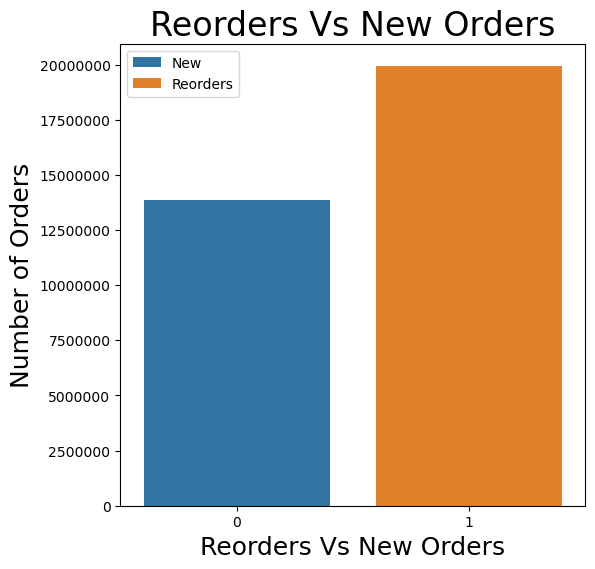

In [36]:
fig,ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='reordered',data = order_products, hue='reordered', dodge=False)
ax.set_xlabel('Reorders Vs New Orders',size=18)
ax.set_ylabel('Number of Orders', size=18)
ax.set_title('Reorders Vs New Orders', size=24)
plt.legend(labels = ['New', 'Reorders'])
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("Aisles With Most Repeated Orders")
plt.show()

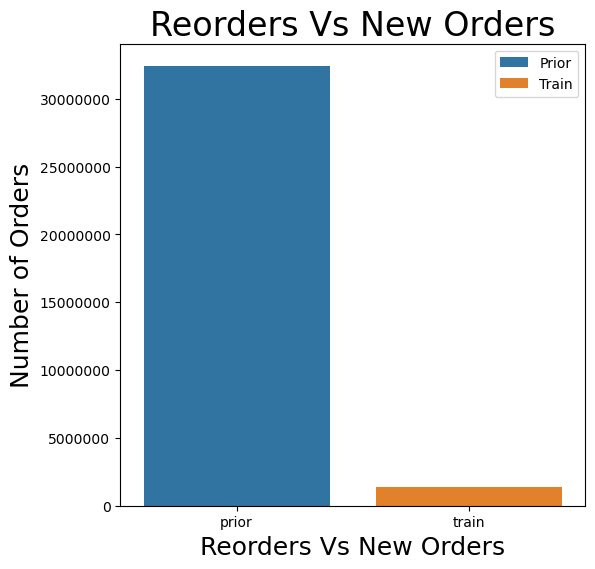

In [37]:
fig,ax = plt.subplots(figsize=(6,6))
ax = sns.countplot(x='eval_set',data = order_products, hue='eval_set', dodge=False)
ax.set_xlabel('Reorders Vs New Orders',size=18)
ax.set_ylabel('Number of Orders', size=18)
ax.set_title('Reorders Vs New Orders', size=24)
plt.legend(labels = ['Prior', 'Train'])
plt.ticklabel_format(style='plain', axis='y')
plt.savefig("Aisles With Most Repeated Orders")
plt.show()